## Importation

In [4]:
import pandas as pd

df = pd.read_csv("../../data/E-commerce/ecommerce_customer_data_custom_ratios.csv")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Customer ID            250000 non-null  int64  
 1   Purchase Date          250000 non-null  object 
 2   Product Category       250000 non-null  object 
 3   Product Price          250000 non-null  int64  
 4   Quantity               250000 non-null  int64  
 5   Total Purchase Amount  250000 non-null  int64  
 6   Payment Method         250000 non-null  object 
 7   Customer Age           250000 non-null  int64  
 8   Returns                202404 non-null  float64
 9   Customer Name          250000 non-null  object 
 10  Age                    250000 non-null  int64  
 11  Gender                 250000 non-null  object 
 12  Churn                  250000 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 24.8+ MB


On remarque plusieurs choses :
1. La variable 'Purchase Date' soit la date de la commande, n'est pas de type date
2. La variable 'Returns' possède des valeurs manquantes. En sachant que 0 signifie qu'il n'y a pas eu de retour, nous supposons que les valeurs manquantes ne correspondent pas à un retour des articles achetés.

## Préparation des données

In [5]:
df['Purchase Date'] = pd.to_datetime(df['Purchase Date'], errors='coerce')

In [6]:
df.isna().sum()

Customer ID                  0
Purchase Date                0
Product Category             0
Product Price                0
Quantity                     0
Total Purchase Amount        0
Payment Method               0
Customer Age                 0
Returns                  47596
Customer Name                0
Age                          0
Gender                       0
Churn                        0
dtype: int64

In [7]:
df['Returns'] = df['Returns'].fillna(0)

Nous vérifions s'il y a des doublons dans notre dataset avec la méthode drop_duplicates(), ce qui n'est pas le cas ici.

In [8]:
print(df.drop_duplicates(inplace = True))

None


In [9]:
df['Purchase Month'] = df['Purchase Date'].dt.month
df['Purchase Year'] = df['Purchase Date'].dt.year
df['Purchase Day'] = df['Purchase Date'].dt.day
df['Purchase Day of Week'] = df['Purchase Date'].dt.day_of_week

In [10]:
print("Avec .dt.day :")
print(df['Purchase Date'].dt.day.head(10))

print("\nType de données :")
print(df['Purchase Date'].dt.day.dtype)

print("\nValeurs uniques :")
print(sorted(df['Purchase Date'].dt.day.unique()))

Avec .dt.day :
0     8
1     5
2    23
3    12
4    27
5     7
6    15
7    27
8     5
9    13
Name: Purchase Date, dtype: int32

Type de données :
int32

Valeurs uniques :
[np.int32(1), np.int32(2), np.int32(3), np.int32(4), np.int32(5), np.int32(6), np.int32(7), np.int32(8), np.int32(9), np.int32(10), np.int32(11), np.int32(12), np.int32(13), np.int32(14), np.int32(15), np.int32(16), np.int32(17), np.int32(18), np.int32(19), np.int32(20), np.int32(21), np.int32(22), np.int32(23), np.int32(24), np.int32(25), np.int32(26), np.int32(27), np.int32(28), np.int32(29), np.int32(30), np.int32(31)]


In [11]:
reverse_mapping = {
    0: 'Lundi',
    1: 'Mardi', 
    2: 'Mercredi',
    3: 'Jeudi',
    4: 'Vendredi',
    5: 'Samedi',
    6: 'Dimanche'
}

df['Purchase Day of Week'] = df['Purchase Day of Week'].map(reverse_mapping)
df['Purchase Day of Week']

0            Mardi
1           Samedi
2            Lundi
3            Jeudi
4         Vendredi
            ...   
249995       Jeudi
249996       Mardi
249997       Jeudi
249998    Mercredi
249999      Samedi
Name: Purchase Day of Week, Length: 250000, dtype: object

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
def simple_seaborn_version(sales_by_month):
    
    sns.set_style("whitegrid")
    plt.figure(figsize=(10, 6))
    
    # Graphique linéaire
    sns.lineplot(data=sales_by_month, 
                x='Purchase Month', 
                y='Total Purchase Amount',
                marker='o',
                markersize=8,
                linewidth=3,
                color='#2E86AB')
    
    # Titre et labels
    plt.title('Monthly Sales Analysis', 
             fontsize=24, 
             fontweight='bold', 
             fontfamily='sans-serif',
             color='black',
             pad=20)
    
    plt.xlabel('Purchase Month', fontsize=12)
    plt.ylabel('Total Purchase Amount', fontsize=12)
    
    # Format des nombres
    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:,.0f}'))
    
    # Ajustement
    plt.tight_layout()
    
    return plt.gcf()

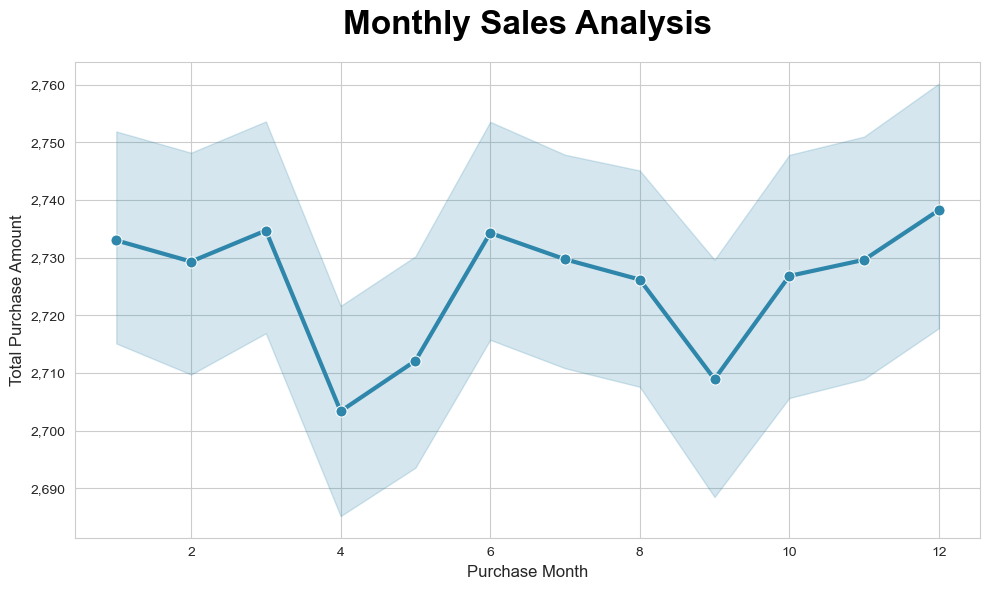

In [25]:
fig = simple_seaborn_version(df)
plt.show()